###### 911 Calls Capstone Project


For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [3]:
df = pd.read_csv('911.csv')

** Check the info() of the df **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [8]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [11]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [12]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [27]:
df['title'].nunique()

110

In [29]:
len(df['title'].unique())

110

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [6]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [17]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS


** What is the most common Reason for a 911 call based off of this new column? **

In [7]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

In [8]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

<AxesSubplot:xlabel='Reason', ylabel='count'>

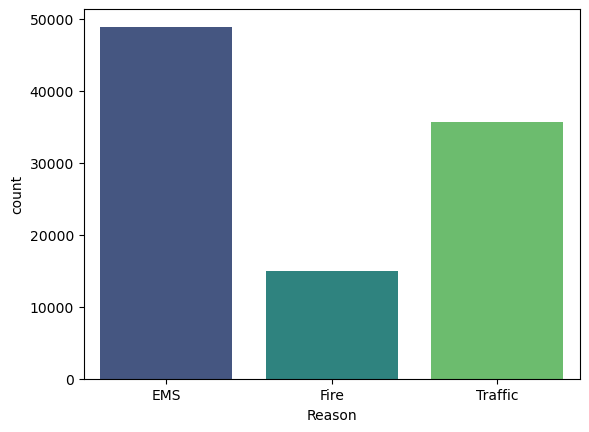

In [9]:
sns.countplot(x='Reason',data=df,palette = 'viridis')

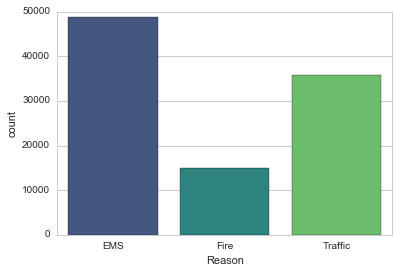

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [55]:
type(df['timeStamp'][1])

str

In [383]:
df['timeStamp'].dtype

dtype('<M8[ns]')

In [385]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [386]:
df['timeStamp'].iloc[0]

Timestamp('2015-12-10 17:40:00')

str

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [10]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [11]:
np.dtype(df['timeStamp'])

dtype('<M8[ns]')

In [78]:
np.dtype(df['timeStamp'])

dtype('<M8[ns]')

In [80]:
type(df['timeStamp'].iloc[1])

pandas._libs.tslibs.timestamps.Timestamp

In [81]:
type(df['timeStamp'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   lat        99492 non-null  float64       
 1   lng        99492 non-null  float64       
 2   desc       99492 non-null  object        
 3   zip        86637 non-null  float64       
 4   title      99492 non-null  object        
 5   timeStamp  99492 non-null  datetime64[ns]
 6   twp        99449 non-null  object        
 7   addr       98973 non-null  object        
 8   e          99492 non-null  int64         
 9   Reason     99492 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 7.6+ MB


In [71]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [30]:
time = df['timeStamp'].iloc[0]
time.dayofweek



3

In [31]:
time.weekday

<bound method Timestamp.weekday of Timestamp('2015-12-10 17:40:00')>

In [32]:
time.day_of_week

3

In [33]:
time.year

2015

In [34]:
time.weekofyear

50

In [12]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month']= df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [96]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [13]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

In [99]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

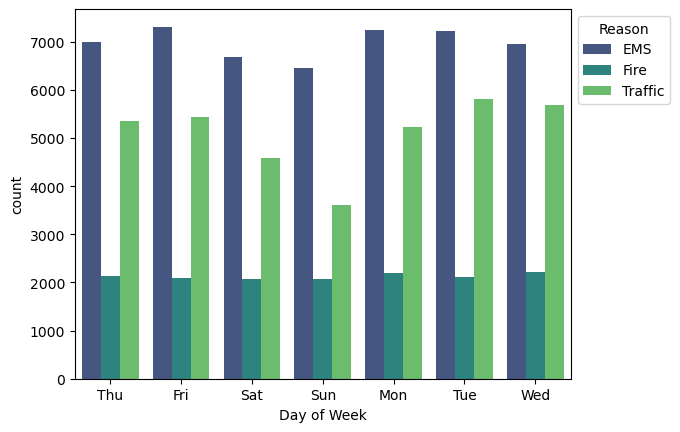

In [35]:
dayOfWeekCount = sns.countplot(data=df,x='Day of Week',hue ='Reason',palette='viridis')
sns.move_legend(dayOfWeekCount,'upper left',bbox_to_anchor=(1,1))


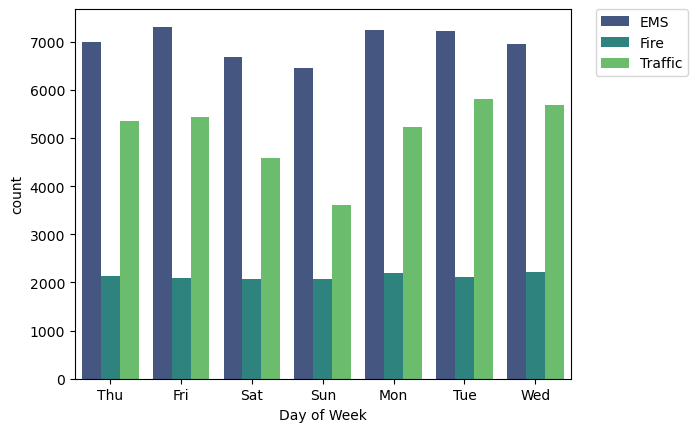

In [37]:
dayOfWeekCount = sns.countplot(data=df,x='Day of Week',hue ='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

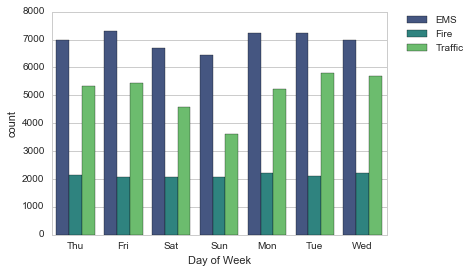

**Now do the same for Month:**

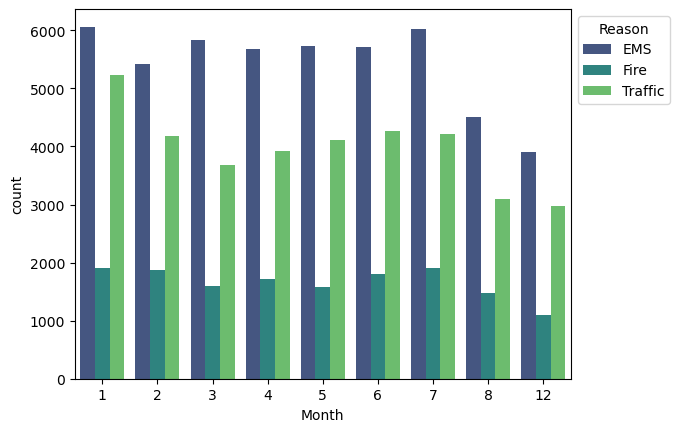

In [114]:
monthCount = sns.countplot(data=df,x='Month',hue ='Reason',palette='viridis')
sns.move_legend(monthCount,'upper left',bbox_to_anchor=(1,1))

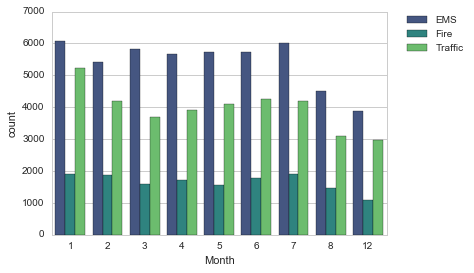

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

In [387]:
#missing September through November.

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [132]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week,Date
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


In [134]:
byMonth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 1 to 12
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   lat          9 non-null      int64
 1   lng          9 non-null      int64
 2   desc         9 non-null      int64
 3   zip          9 non-null      int64
 4   title        9 non-null      int64
 5   timeStamp    9 non-null      int64
 6   twp          9 non-null      int64
 7   addr         9 non-null      int64
 8   e            9 non-null      int64
 9   Reason       9 non-null      int64
 10  Hour         9 non-null      int64
 11  Day of Week  9 non-null      int64
dtypes: int64(12)
memory usage: 936.0 bytes


In [41]:
byMonth.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 12], dtype='int64', name='Month')

In [70]:
byMonth.iloc[1].median()

11467.0

In [71]:
byMonth[1]

KeyError: 1

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

(7000.0, 14000.0)

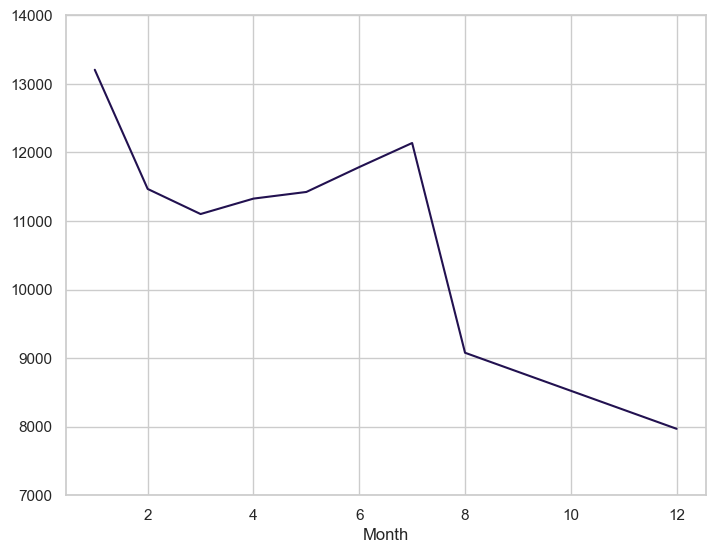

In [394]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(byMonth.index,byMonth['lat'])
ax.set_xlabel('Month')
ax.grid(True)
ax.set_ylim(7000,14000)

<AxesSubplot:xlabel='Month'>

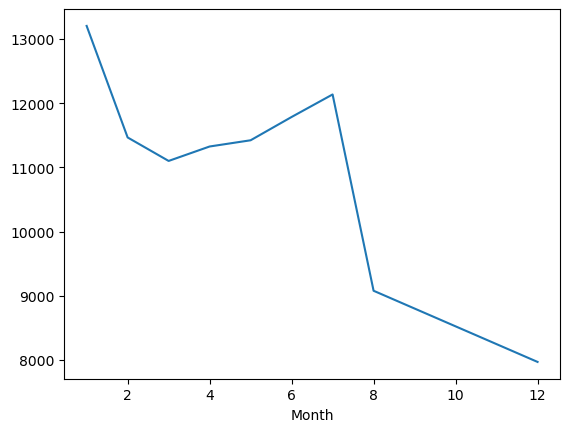

In [48]:
byMonth['e'].plot()

<AxesSubplot:>

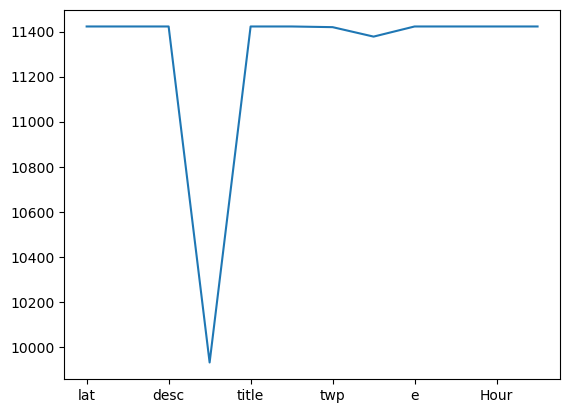

In [50]:
byMonth.median().plot() #need to make a median column

In [92]:


byMonth['Median2'] = byMonth.apply(lambda x: x.median(),axis=1)

In [75]:
byMonth['Median'] = byMonth.median(axis=1)

In [97]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week,Date,Median,Median2,Mode
Month,,,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205.0,13205.0,13205.0
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467.0,11467.0,11467.0
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101.0,11101.0,11101.0
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326.0,11326.0,11326.0
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423.0,11423.0,11423.0


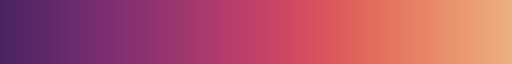

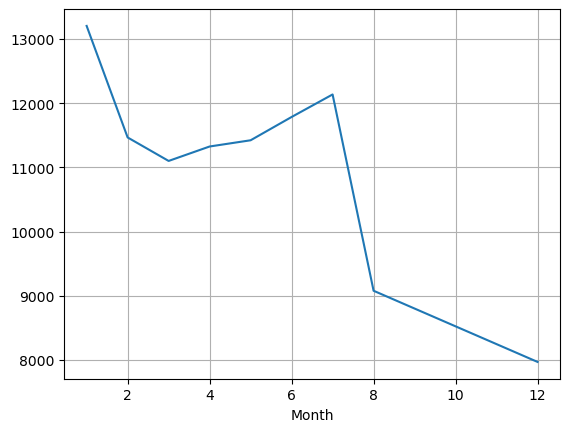

In [153]:
byMonth['Median'].plot()
plt.grid(True)
plt.colormaps['flare_r']

In [98]:
byMonth['Mode']=byMonth.mode(axis=1) #this counts the median as a data point

In [104]:
byMonth.iloc[1].mode()

0    11467.0
Name: 2, dtype: float64

In [129]:
byMonth.iloc[0,0:13]

lat            13205.0
lng            13205.0
desc           13205.0
zip            11527.0
title          13205.0
timeStamp      13205.0
twp            13203.0
addr           13096.0
e              13205.0
Reason         13205.0
Hour           13205.0
Day of Week    13205.0
Date           13205.0
Name: 1, dtype: float64

In [134]:
byMonthMode = byMonth.mode(axis=1) #store as variable and add to the df
#once the values are found

In [135]:
byMonthMedian = byMonth.median(axis=1)

In [136]:
byMonth['Median'] = byMonthMedian
byMonth['Mode']= byMonthMode

In [137]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week,Date,Median,Mode
Month,,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205.0,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467.0,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101.0,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326.0,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423.0,11423


In [125]:
#the above removes the median and mode columns from use in calculating the 
#median and mode

SyntaxError: positional argument follows keyword argument (1813688121.py, line 1)

In [140]:
byMonth[['lat','Median']]

,lat,Median
Month,,
1,13205,13205.0
2,11467,11467.0
3,11101,11101.0
4,11326,11326.0
5,11423,11423.0
6,11786,11786.0
7,12137,12137.0
8,9078,9078.0
12,7969,7969.0


In [142]:
byMonth[['lat','Median']].mean()

lat       11054.666667
Median    11054.666667
dtype: float64

In [143]:
byMonth[['lat','Median']].mean(axis=1)

Month
1     13205.0
2     11467.0
3     11101.0
4     11326.0
5     11423.0
6     11786.0
7     12137.0
8      9078.0
12     7969.0
dtype: float64

In [190]:
#byMonth['Median'] =
byMonth.iloc[:,0:13].median(axis=1)

Month
1     13205.0
2     11467.0
3     11101.0
4     11326.0
5     11423.0
6     11786.0
7     12137.0
8      9078.0
12     7969.0
dtype: float64

In [150]:
byMonth['Mode'] = byMonth.iloc[:,0:13].mode(axis=1)

In [151]:
#this is the correct way to do it

In [148]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week,Date,Median,Mode
Month,,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205.0,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467.0,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101.0,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326.0,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423.0,11423


In [130]:
byMonth.iloc[0,0:13].mode()

0    13205.0
Name: 1, dtype: float64

In [397]:
byMonth.set_index('Month',inplace=True)

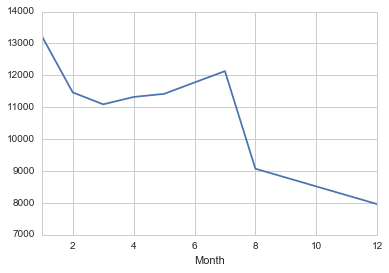

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

In [395]:
byMonth.reset_index(inplace=True) #can also be done in line to not keep in place

In [396]:
byMonth.reset_index()

,index,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
0,0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
5,5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
6,6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
7,7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
8,8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


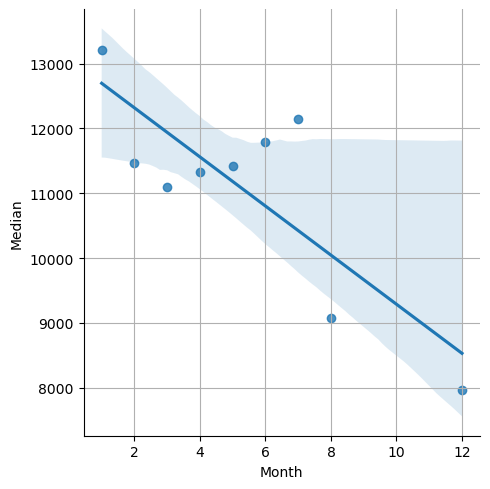

In [155]:

sns.lmplot(x='Month',y='Median',data=byMonth.reset_index())
plt.grid(True)

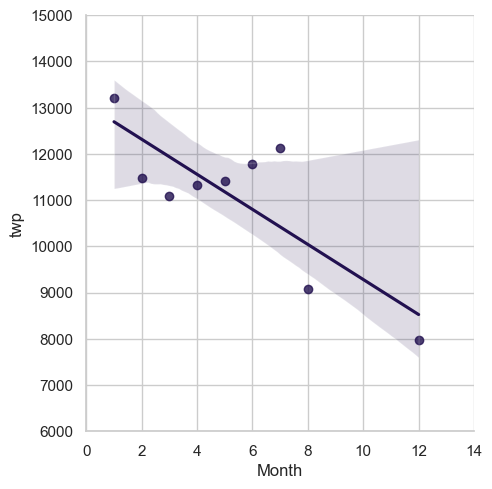

In [157]:
sns.set_theme(style='whitegrid',palette='magma')
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())
plt.xlim(0,14)
plt.ylim(6000,15000)
plt.show()

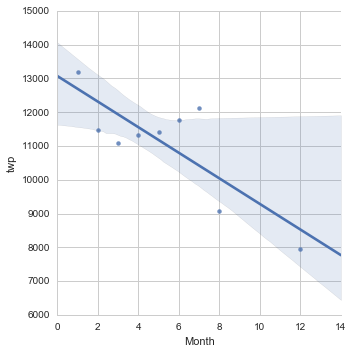

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [16]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [160]:
df['timeStamp'][0].date()

datetime.date(2015, 12, 10)

In [161]:
t = df['timeStamp'].iloc[0]

In [162]:
t.date()

datetime.date(2015, 12, 10)

In [169]:
df.iloc[:,5].date() #must use lambda,.date does not function with
#series like some other functions

0   2015-12-10 17:40:01
Name: timeStamp, dtype: datetime64[ns]

In [165]:
df.iloc[:,0]

0        40.297876
1        40.258061
2        40.121182
3        40.116153
4        40.251492
           ...    
99487    40.132869
99488    40.006974
99489    40.115429
99490    40.186431
99491    40.207055
Name: lat, Length: 99492, dtype: float64

In [170]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


In [171]:
df.groupby('Date').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,328,328,328,279,328,328,328,327,328,328,328,328,328
2016-08-21,357,357,357,299,357,357,357,352,357,357,357,357,357
2016-08-22,389,389,389,336,389,389,388,384,389,389,389,389,389


In [173]:
df.groupby('Date').count()['lat']

Date
2015-12-10    115
2015-12-11    396
2015-12-12    403
2015-12-13    319
2015-12-14    447
             ... 
2016-08-20    328
2016-08-21    357
2016-08-22    389
2016-08-23    439
2016-08-24    132
Name: lat, Length: 259, dtype: int64

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

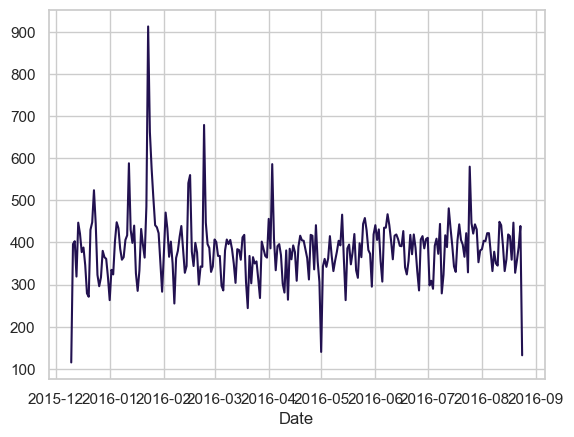

In [175]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout

In [17]:
byDate = df.groupby('Date')

In [18]:
byDateCount = byDate.count()

/var/folders/1y/r55yw5b97vx40qpg2dsw_jvh0000gp/T/ipykernel_26070/628858995.py:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



(100.0, 1000.0)

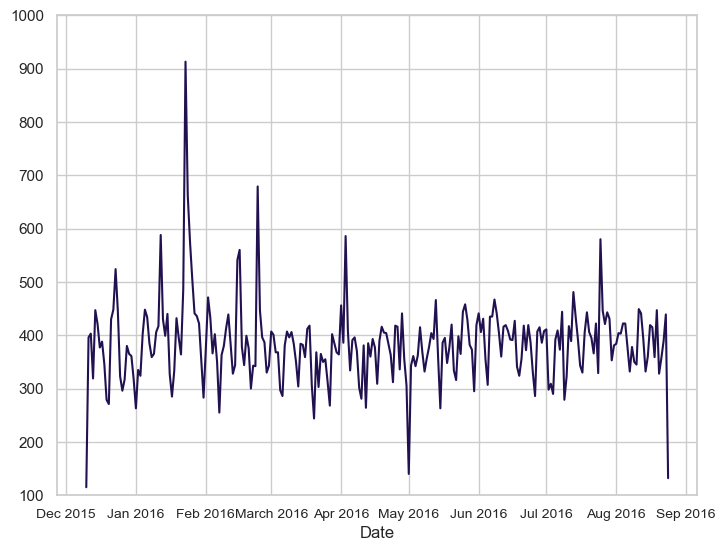

In [416]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(byDate.count().index,byDate['e'].count())
ax.set_xlabel('Date')
ax.set_xticklabels(['Dec 2015','Jan 2016','Feb 2016','March 2016',
                   'Apr 2016','May 2016','Jun 2016','Jul 2016',
                   'Aug 2016','Sep 2016'],fontsize = 10)
ax.grid(True)
ax.set_ylim(100,1000)

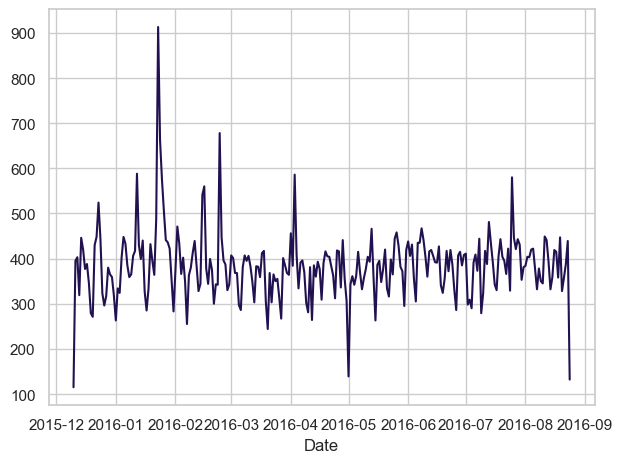

In [417]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

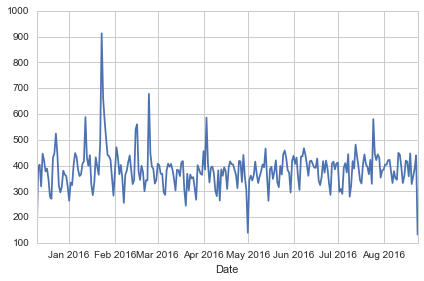

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

In [419]:
byDateEMS = df[df['Reason']=='EMS'].groupby('Date')

In [420]:
byDateEMS.count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,57,57,57,52,57,57,57,57,57,57,57,57,57
2015-12-11,186,186,186,166,186,186,186,186,186,186,186,186,186
2015-12-12,189,189,189,171,189,189,189,189,189,189,189,189,189
2015-12-13,190,190,190,178,190,190,190,190,190,190,190,190,190
2015-12-14,222,222,222,201,222,222,222,222,222,222,222,222,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,159,159,159,139,159,159,159,159,159,159,159,159,159
2016-08-21,165,165,165,144,165,165,165,165,165,165,165,165,165
2016-08-22,182,182,182,163,182,182,182,182,182,182,182,182,182


AttributeError: 'function' object has no attribute 'set_title'

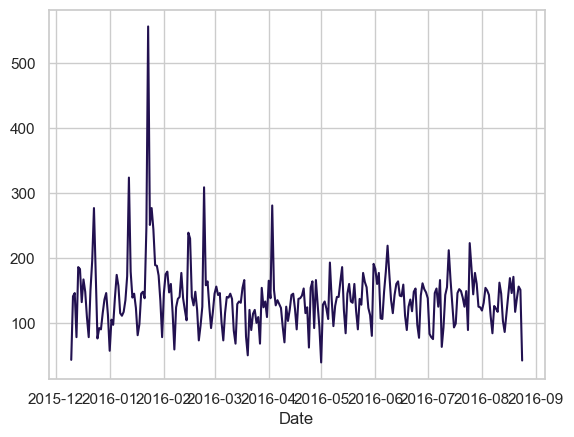

In [185]:
ax=plt.axes
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
#plt.title('Traffic')
ax.set_title('Traffic') #bugged?
#ax.set_title('Fire')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Date'>

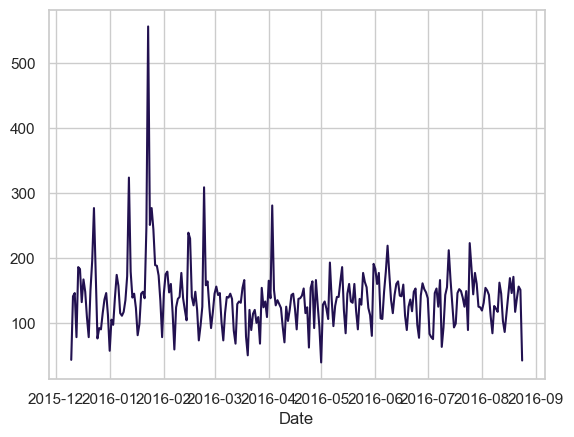

In [177]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()


In [ ]:
#Final answers:

/var/folders/1y/r55yw5b97vx40qpg2dsw_jvh0000gp/T/ipykernel_26070/1203858159.py:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



(50.0, 250.0)

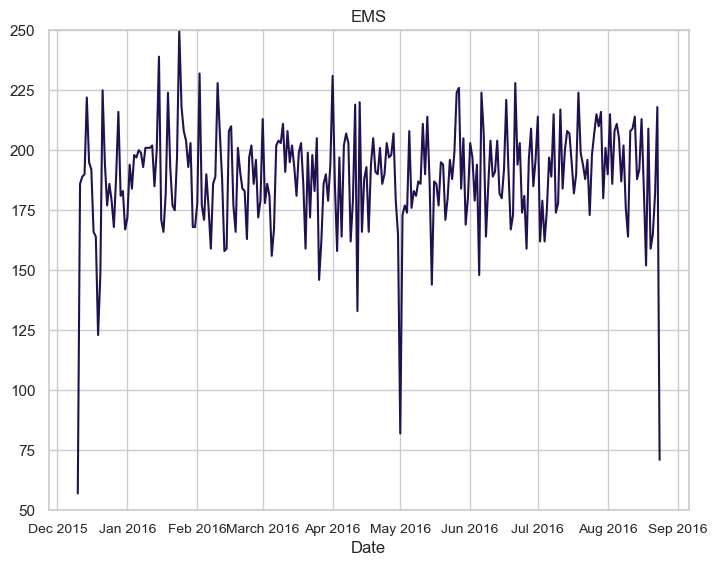

In [430]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(byDateEMS.count().index,byDateEMS['e'].count())
ax.set_xlabel('Date')
ax.set_title('EMS')
ax.set_xticklabels(['Dec 2015','Jan 2016','Feb 2016','March 2016',
                   'Apr 2016','May 2016','Jun 2016','Jul 2016',
                   'Aug 2016','Sep 2016'],fontsize = 10)
ax.grid(True)
ax.set_ylim(50,250)

In [179]:
byDateTraffic = df[df['Reason']=='Traffic'].groupby('Date')

/var/folders/1y/r55yw5b97vx40qpg2dsw_jvh0000gp/T/ipykernel_43043/458475383.py:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



(0.0, 600.0)

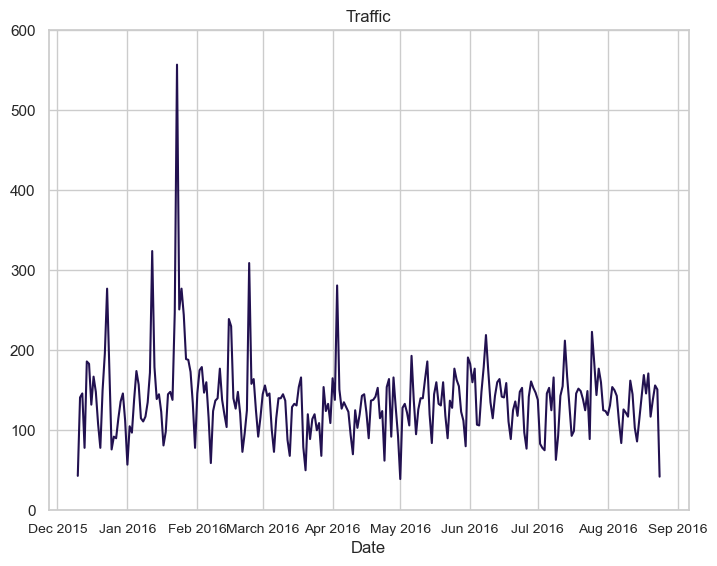

In [181]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(byDateTraffic.count().index,byDateTraffic['e'].count())
ax.set_xlabel('Date')
ax.set_title('Traffic')
ax.set_xticklabels(['Dec 2015','Jan 2016','Feb 2016','March 2016',
                   'Apr 2016','May 2016','Jun 2016','Jul 2016',
                   'Aug 2016','Sep 2016'],fontsize = 10)
ax.grid(True)
ax.set_ylim(0,600)

In [229]:
byDateFire = df[df['Reason']=='Fire'].groupby('Date')

/var/folders/1y/r55yw5b97vx40qpg2dsw_jvh0000gp/T/ipykernel_26070/2862212794.py:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



(0.0, 180.0)

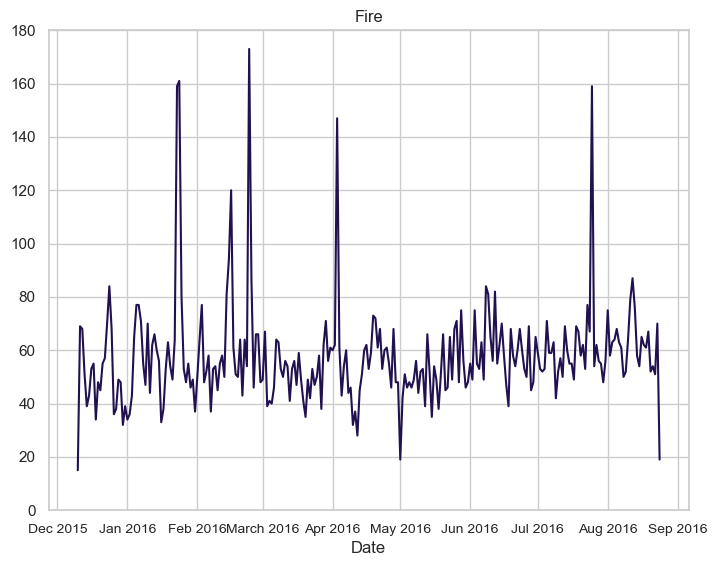

In [232]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(byDateFire.count().index,byDateFire['e'].count())
ax.set_xlabel('Date')
ax.set_title('Fire')
ax.set_xticklabels(['Dec 2015','Jan 2016','Feb 2016','March 2016',
                   'Apr 2016','May 2016','Jun 2016','Jul 2016',
                   'Aug 2016','Sep 2016'],fontsize = 10)
ax.grid(True)
ax.set_ylim(0,180)

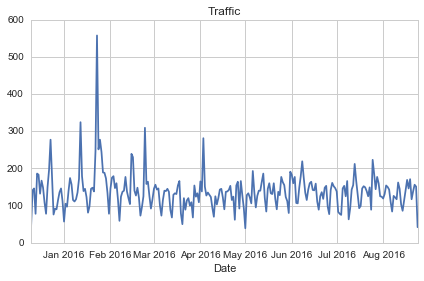

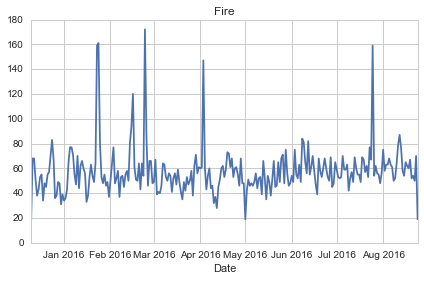

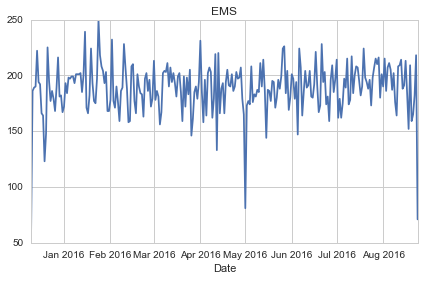

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [234]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


In [312]:
dayOfWeek = df.set_index(['Day of Week'])
dayOfWeek

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Date
Day of Week,,,,,,,,,,,,,
Thu,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,2015-12-10
Thu,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,2015-12-10
Thu,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,2015-12-10
Thu,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,2015-12-10
Thu,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,2015-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wed,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,11,8,2016-08-24
Wed,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,11,8,2016-08-24
Wed,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,11,8,2016-08-24


In [308]:
df[df['Day of Week']=='Thu'][df['Hour']==1].count()

/var/folders/1y/r55yw5b97vx40qpg2dsw_jvh0000gp/T/ipykernel_26070/3055948827.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



lat            202
lng            202
desc           202
zip            180
title          202
timeStamp      202
twp            202
addr           202
e              202
Reason         202
Hour           202
Month          202
Day of Week    202
Date           202
dtype: int64

In [436]:
dayOfWeekHour = df.set_index(['Day of Week','Hour'])
dayOfWeekHour

lat        lng  \
Day of Week Hour                         
Thu         17    40.297876 -75.581294   
            17    40.258061 -75.264680   
            17    40.121182 -75.351975   
            17    40.116153 -75.343513   
            17    40.251492 -75.603350   
...                     ...        ...   
Wed         11    40.132869 -75.333515   
            11    40.006974 -75.289080   
            11    40.115429 -75.334679   
            11    40.186431 -75.192555   
            11    40.207055 -75.317952   

                                                               desc      zip  \
Day of Week Hour                                                               
Thu         17    REINDEER CT & DEAD END;  NEW HANOVER; Station ...  19525.0   
            17    BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...  19446.0   
            17    HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...  19401.0   
            17    AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...  19401.0   
            17    CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...      NaN   
...                                                             ...      ...   
Wed         11    MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...  19401.0   
            11    LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...  19003.0   
            11    CHESTNUT ST & WALNUT ST;  NORRISTOWN; Station ...  19401.0   
            11    WELSH RD & WEBSTER LN;  HORSHAM; Station 352; ...  19002.0   
            11    MORRIS RD & S BROAD ST; UPPER GWYNEDD; 2016-08...  19446.0   

                                        title           timeStamp  \
Day of Week Hour                                                    
Thu         17         EMS: BACK PAINS/INJURY 2015-12-10 17:40:00   
            17        EMS: DIABETIC EMERGENCY 2015-12-10 17:40:00   
            17            Fire: GAS-ODOR/LEAK 2015-12-10 17:40:00   
            17         EMS: CARDIAC EMERGENCY 2015-12-10 17:40:01   
            17                 EMS: DIZZINESS 2015-12-10 17:40:01   
...                                       ...                 ...   
Wed         11    Traffic: VEHICLE ACCIDENT - 2016-08-24 11:06:00   
            11    Traffic: VEHICLE ACCIDENT - 2016-08-24 11:07:02   
            11               EMS: FALL VICTIM 2016-08-24 11:12:00   
            11           EMS: NAUSEA/VOMITING 2016-08-24 11:17:01   
            11    Traffic: VEHICLE ACCIDENT - 2016-08-24 11:17:02   

                                twp                            addr  e  \
Day of Week Hour                                                         
Thu         17          NEW HANOVER          REINDEER CT & DEAD END  1   
            17    HATFIELD TOWNSHIP      BRIAR PATH & WHITEMARSH LN  1   
            17           NORRISTOWN                        HAWS AVE  1   
            17           NORRISTOWN              AIRY ST & SWEDE ST  1   
            17     LOWER POTTSGROVE        CHERRYWOOD CT & DEAD END  1   
...                             ...                             ... ..   
Wed         11           NORRISTOWN         MARKLEY ST & W LOGAN ST  1   
            11         LOWER MERION  LANCASTER AVE & RITTENHOUSE PL  1   
            11           NORRISTOWN         CHESTNUT ST & WALNUT ST  1   
            11              HORSHAM           WELSH RD & WEBSTER LN  1   
            11        UPPER GWYNEDD          MORRIS RD & S BROAD ST  1   

                   Reason  Month        Date  
Day of Week Hour                              
Thu         17        EMS     12  2015-12-10  
            17        EMS     12  2015-12-10  
            17       Fire     12  2015-12-10  
            17        EMS     12  2015-12-10  
            17        EMS     12  2015-12-10  
...                   ...    ...         ...  
Wed         11    Traffic      8  2016-08-24  
            11    Traffic      8  2016-08-24  
            11        EMS      8  2016-08-24  
            11        EMS      8  2016-08-24  
           

In [437]:
dayWkHrUnstacked = dayOfWeekHour.groupby(level=[0,1]).sum()['e'].unstack(level=1)

In [438]:
dayWkHrUnstacked

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Now create a HeatMap using this new DataFrame. **

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

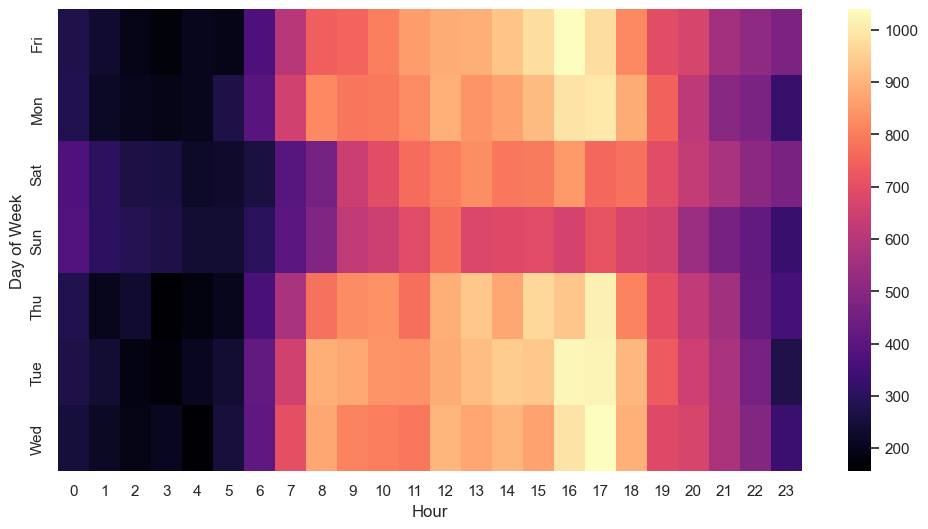

In [439]:
plt.figure(figsize=(12,6))
sns.heatmap(dayWkHrUnstacked,cmap='magma')

In [367]:
#dayWkHrUnstacked = dayOfWeekHour.groupby(level=[0,1]).sum()['e'].unstack(level=1)
#dayWkHrUnstacked = dayOfWeekHour[dayOfWeekHour['Reason'=='EMS']].groupby(level = [0,1]).sum['e'].unstack(level=1)

dayWkHrEMS = dayOfWeekHour[dayOfWeekHour['Reason']=='EMS'].groupby(level = [0,1]).sum()['e'].unstack()
dayWkHrTraffic = dayOfWeekHour[dayOfWeekHour['Reason']=='Traffic'].groupby(level = [0,1]).sum()['e'].unstack()
dayWkHrFire = dayOfWeekHour[dayOfWeekHour['Reason']=='Fire'].groupby(level = [0,1]).sum()['e'].unstack()


Text(0.5, 1.0, 'EMS')

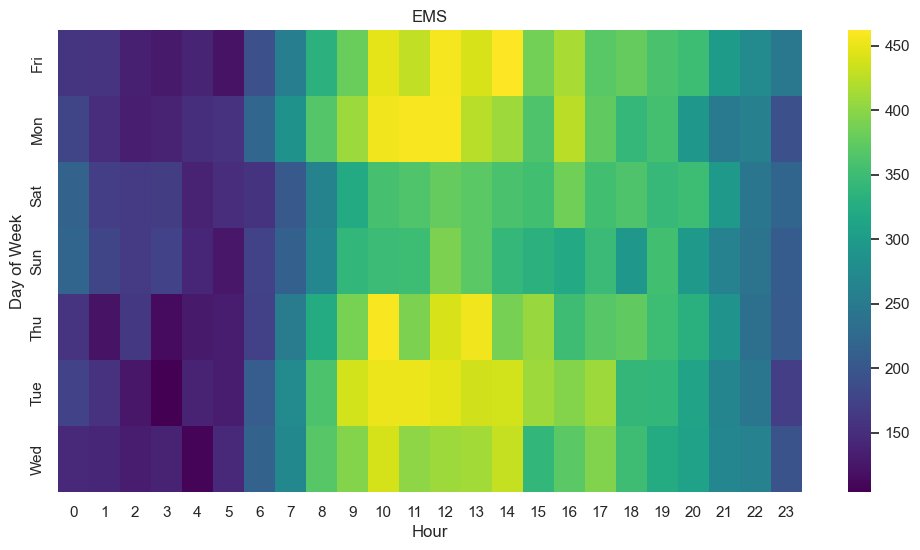

In [441]:
plt.figure(figsize=(12,6))
ax = plt.axes()
sns.heatmap(dayWkHrEMS,cmap = 'viridis')
ax.set_title('EMS')

Text(0.5, 1.0, 'Traffic')

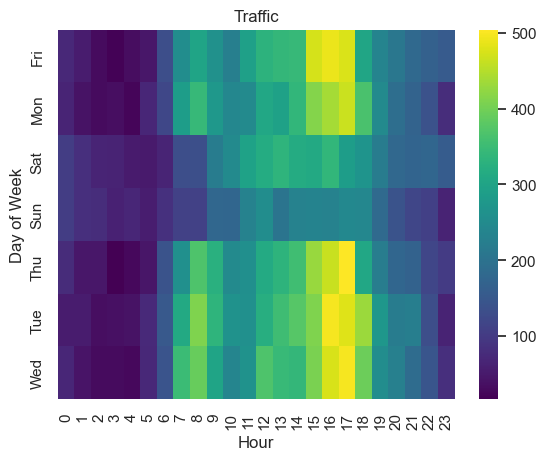

In [372]:
ax = plt.axes()
sns.heatmap(dayWkHrTraffic,cmap = 'viridis')
ax.set_title('Traffic')

Text(0.5, 1.0, 'Fire')

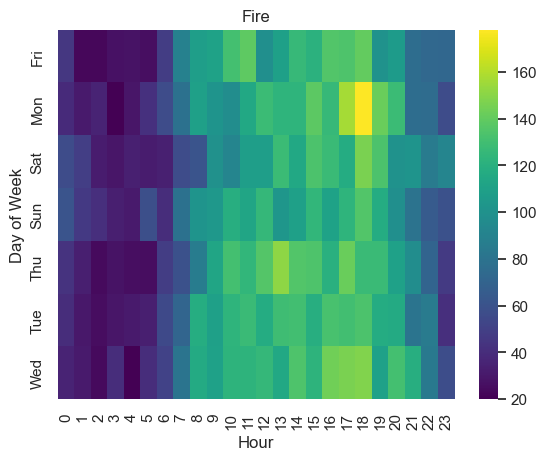

In [373]:
ax = plt.axes()
sns.heatmap(dayWkHrFire,cmap = 'viridis')
ax.set_title('Fire')

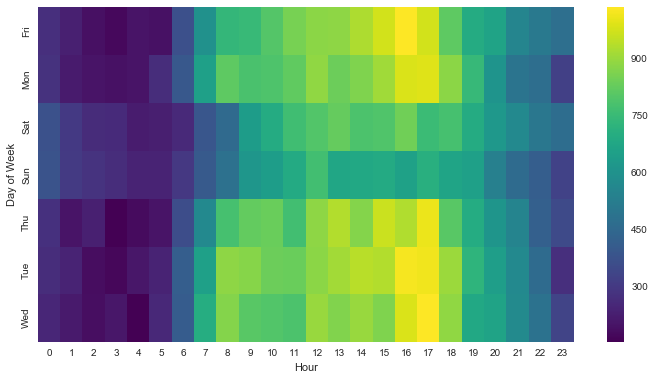

** Now create a clustermap using this DataFrame. **

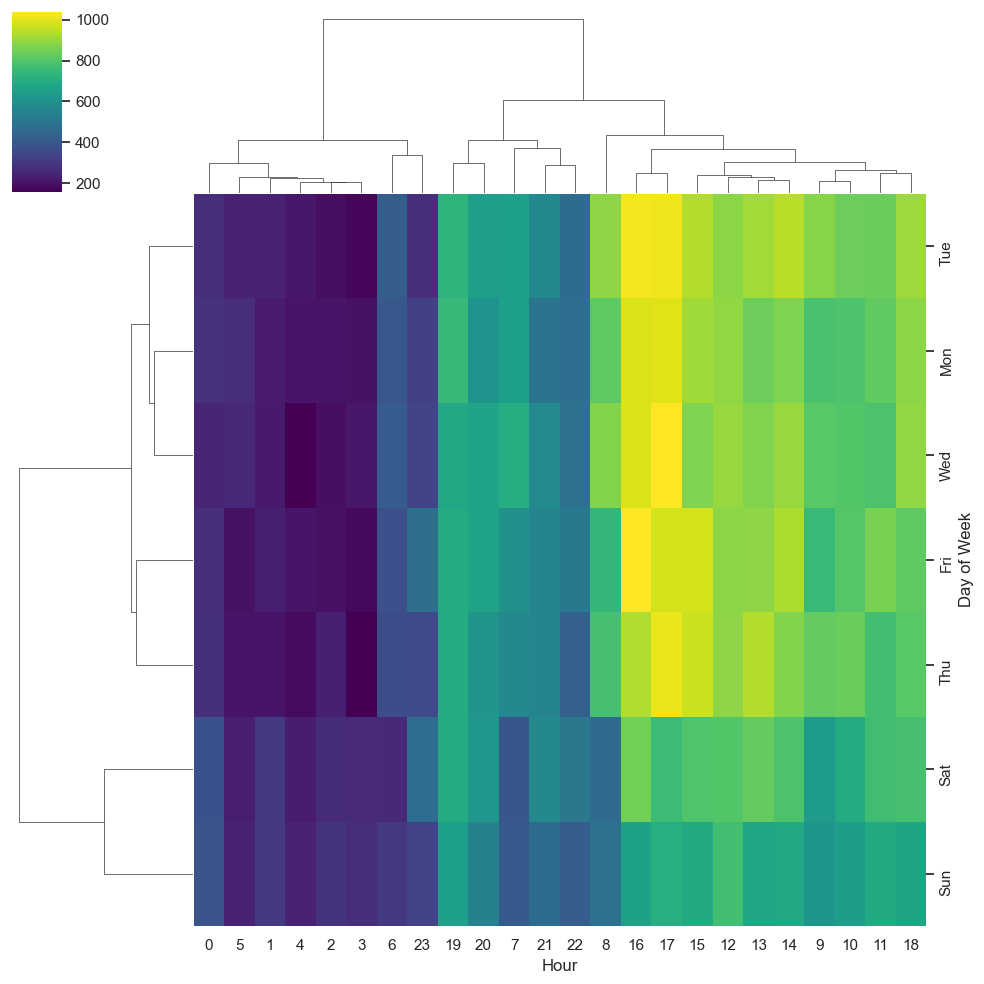

In [339]:
sns.clustermap(dayWkHrUnstacked,cmap = 'viridis')

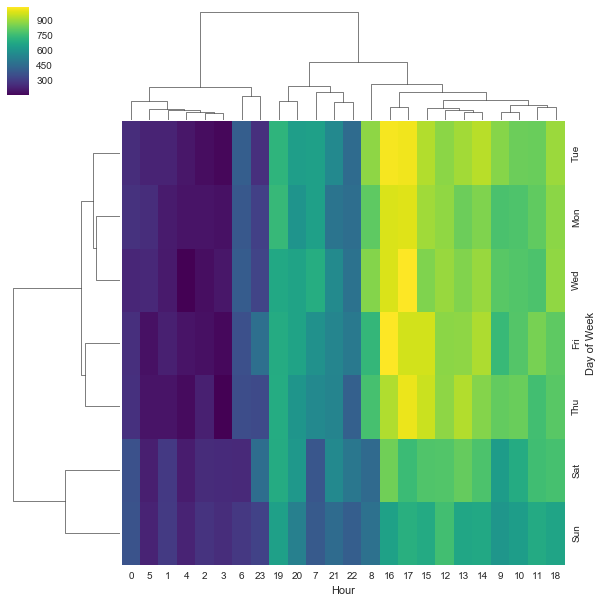

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [182]:
monthByDay = df.groupby(['Day of Week','Month']).sum()['e'].unstack(level = 1)
monthByDay

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

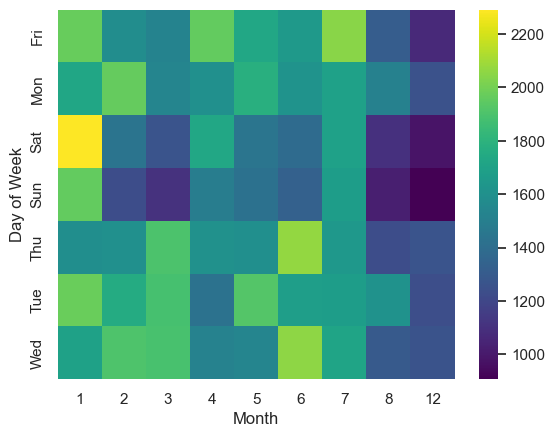

In [183]:
sns.heatmap(monthByDay,cmap = 'viridis')


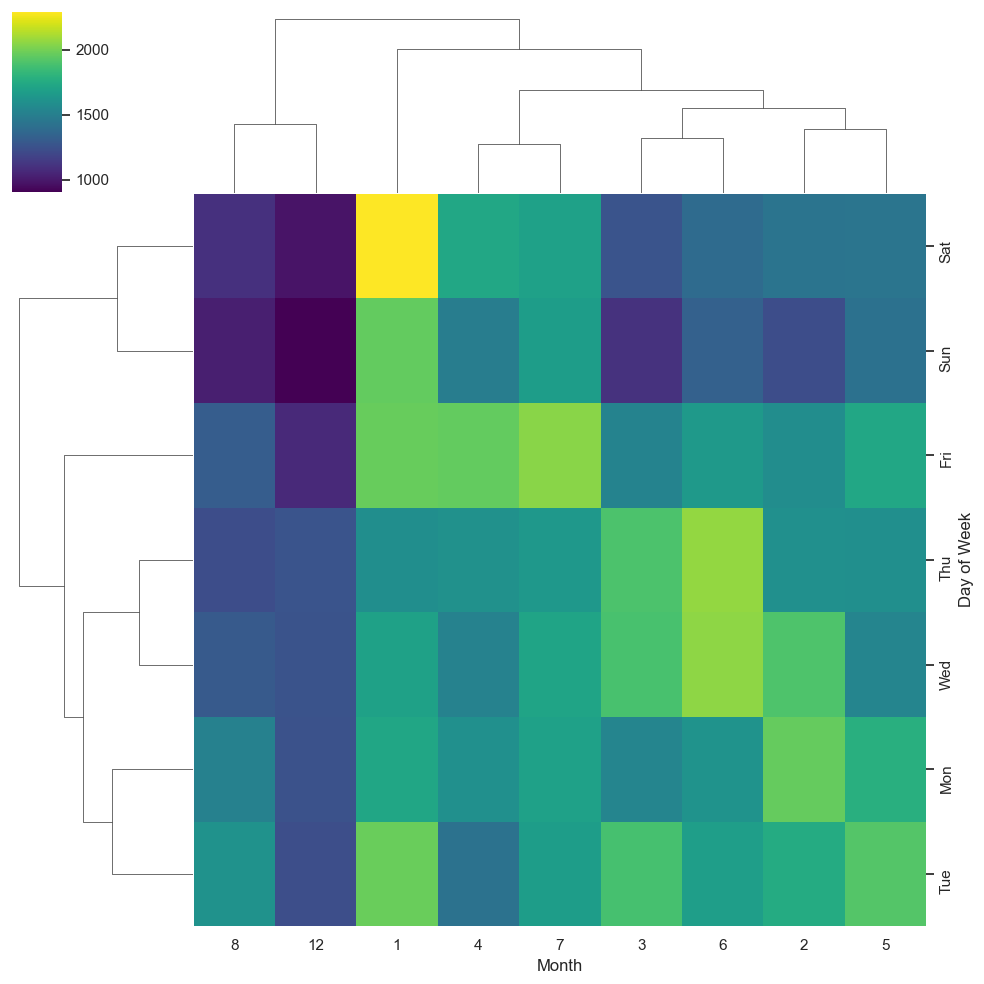

In [347]:
sns.clustermap(monthByDay,cmap = 'viridis')

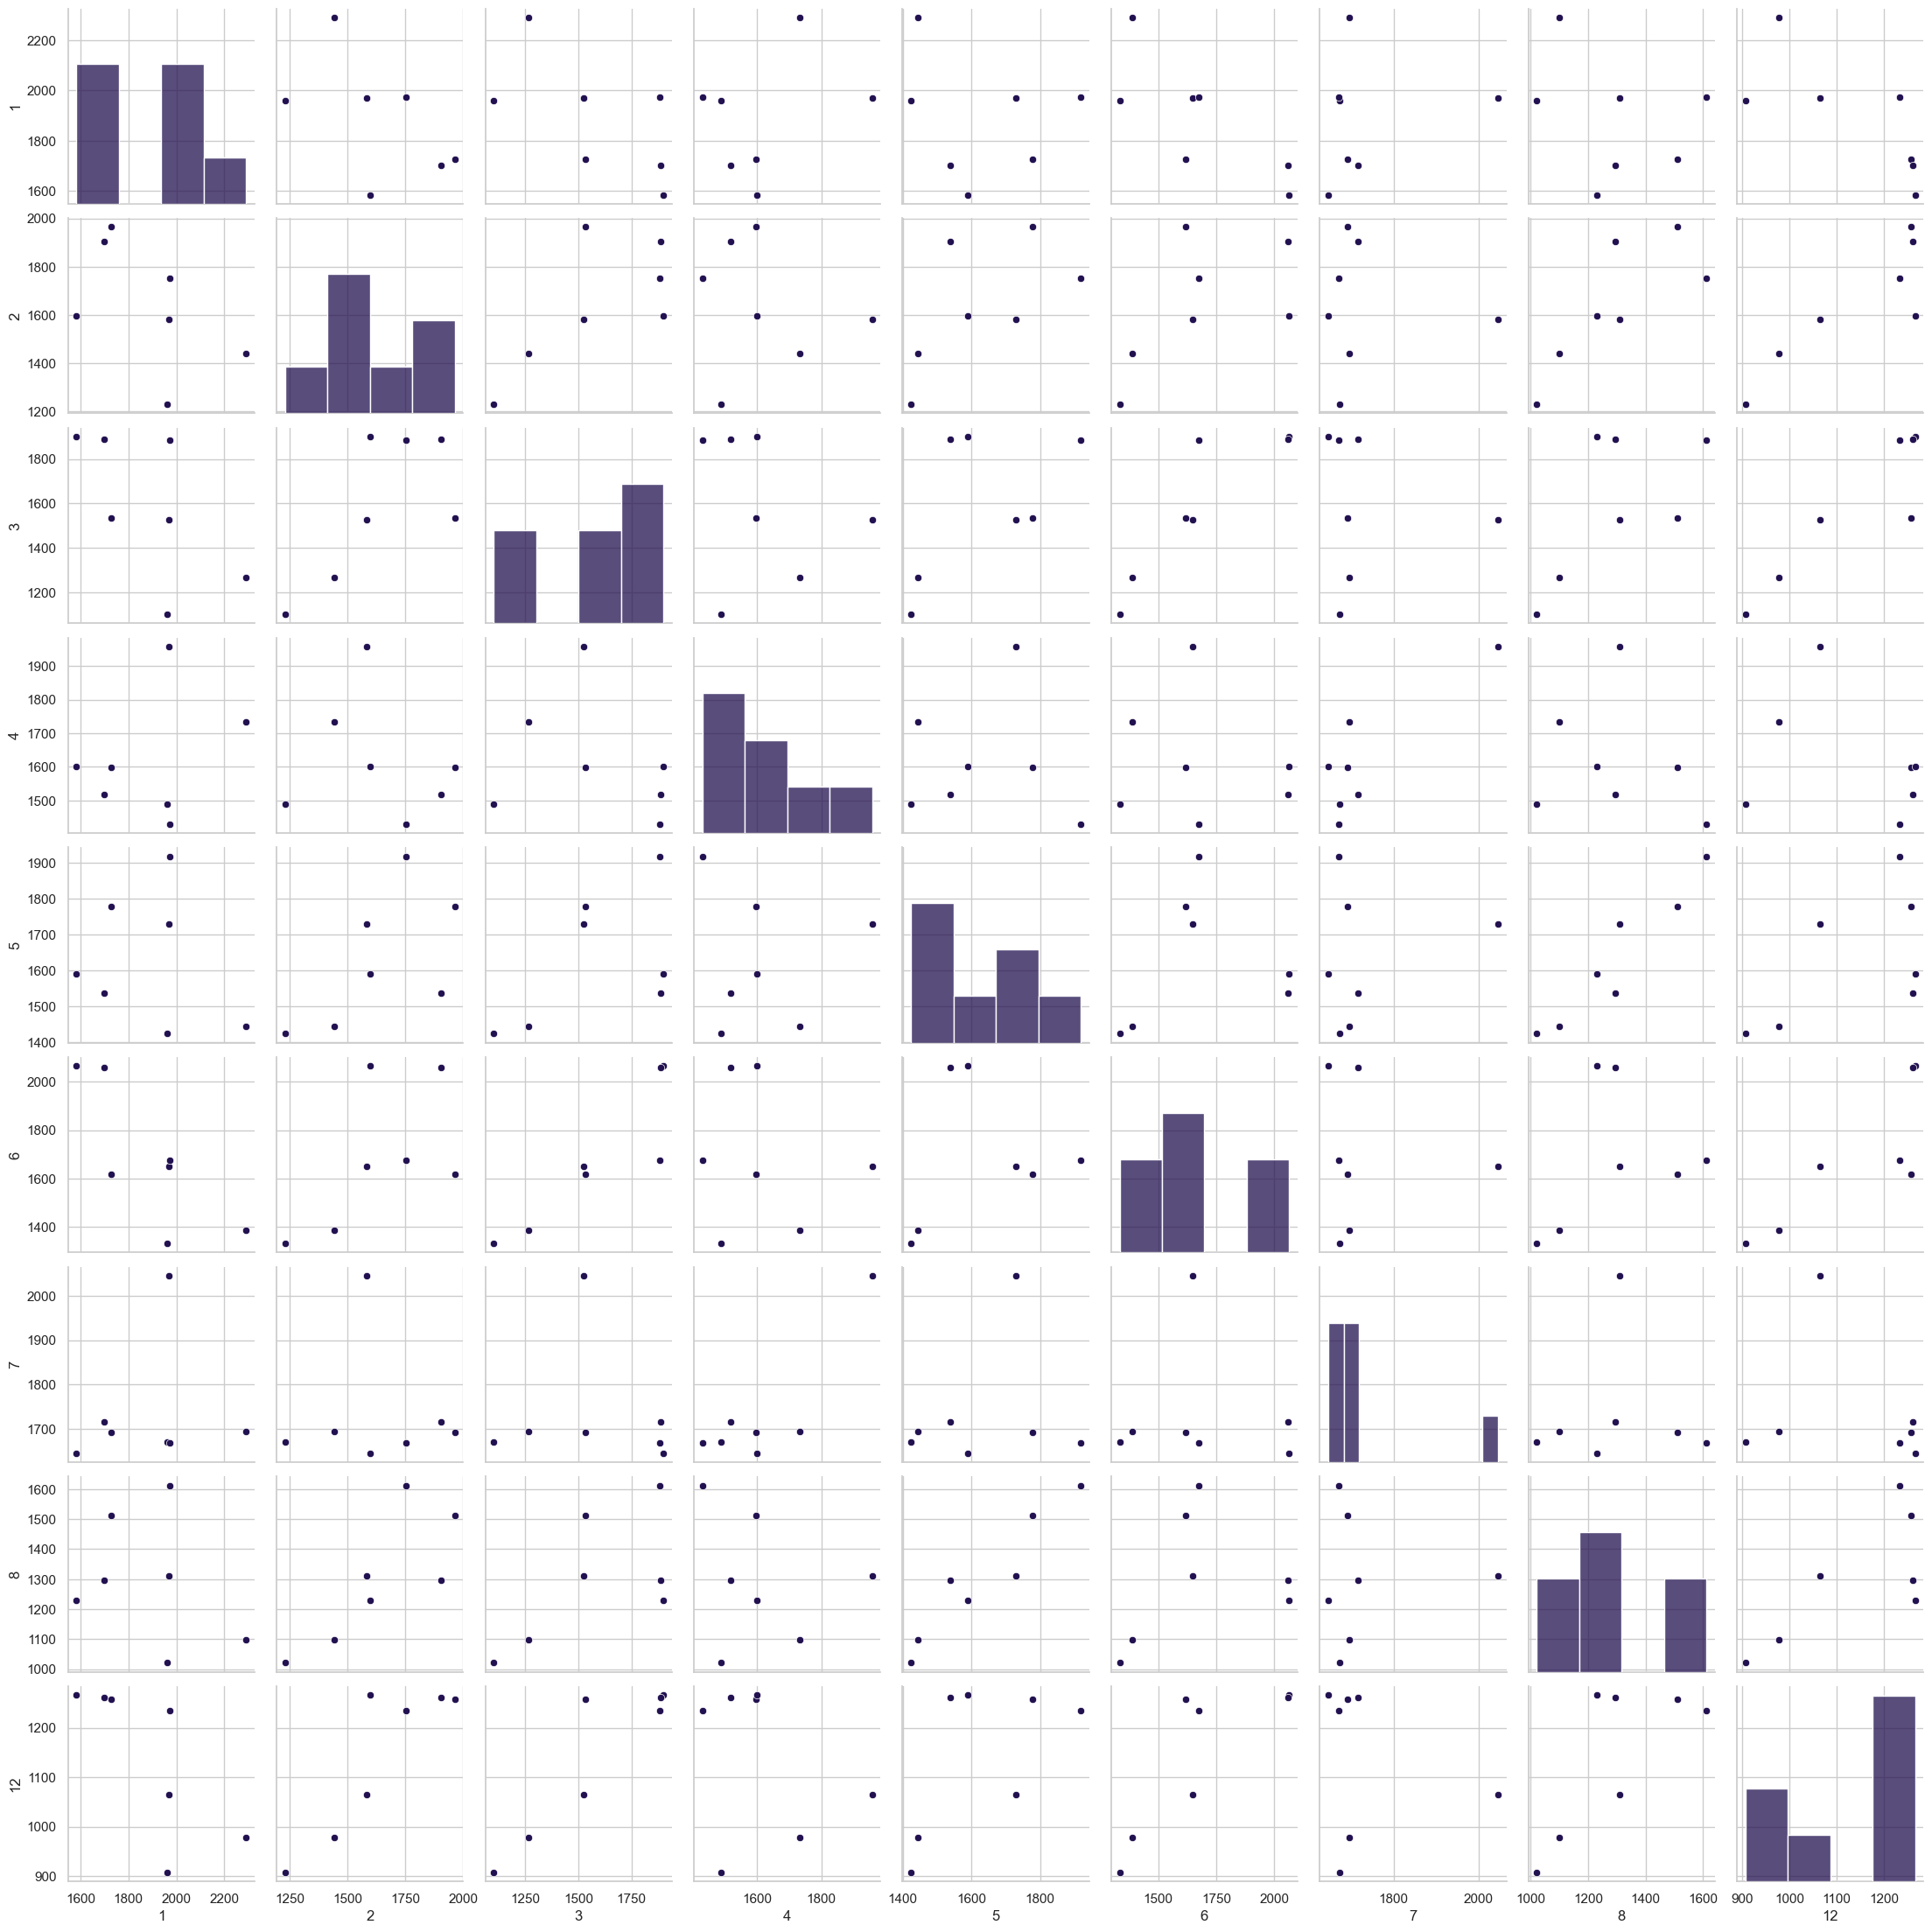

In [348]:
sns.pairplot(monthByDay)

In [350]:
sns.violinplot(x='Month',y='Day of Week',data = monthByDay)

ValueError: Could not interpret input 'Month'

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


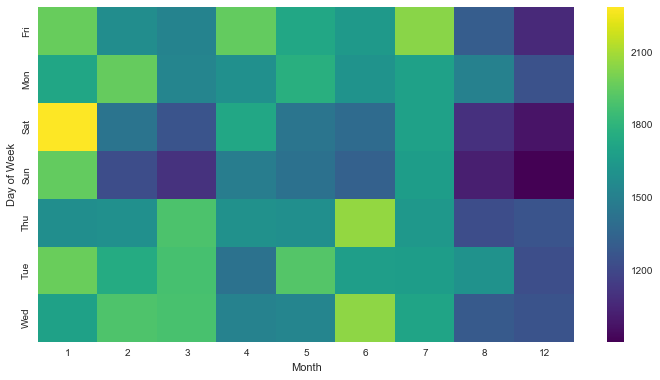

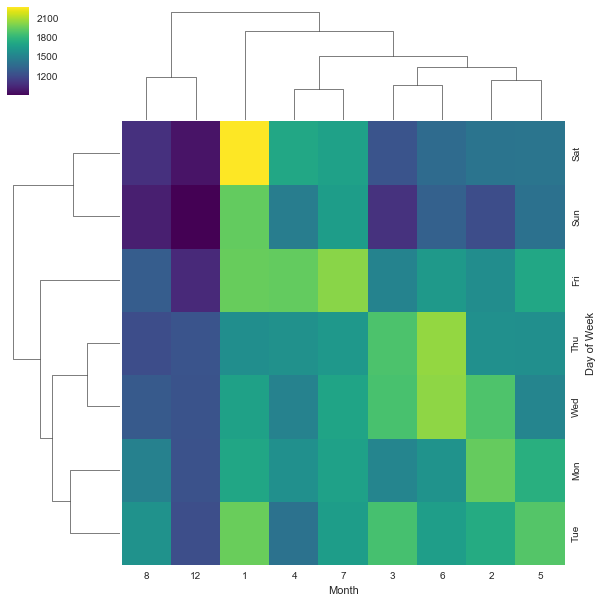

**Continue exploring the Data however you see fit!**
# Great Job!

In [20]:
monthByDayEMS = df[df['Reason']=='EMS'].groupby(['Day of Week','Month']).sum()['e'].unstack(level = 1)
monthByDayTraffic = df[df['Reason']=='Traffic'].groupby(['Day of Week','Month']).sum()['e'].unstack(level = 1)
monthByDayFire = df[df['Reason']=='Fire'].groupby(['Day of Week','Month']).sum()['e'].unstack(level = 1)


Text(0.5, 1.0, 'EMS')

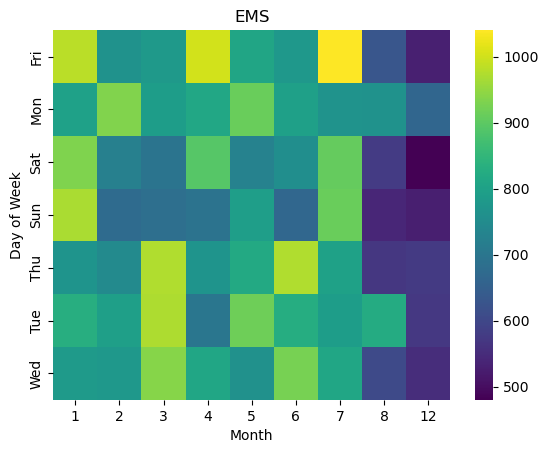

In [24]:
emsHeat = sns.heatmap(monthByDayEMS,cmap = 'viridis')
emsHeat.set_title('EMS')

Text(0.5, 1.0, 'Traffic')

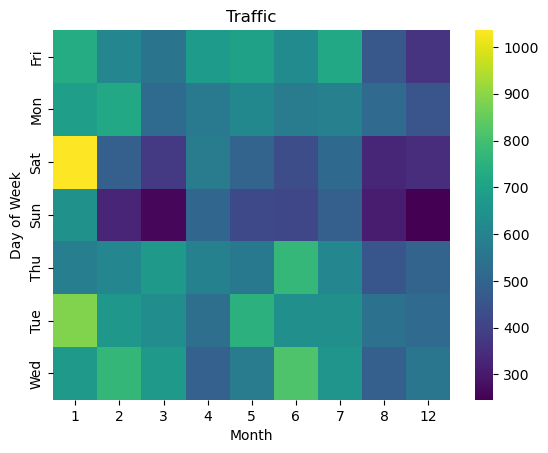

In [25]:
trafficHeat = sns.heatmap(monthByDayTraffic,cmap = 'viridis')
trafficHeat.set_title('Traffic')

Text(0.5, 1.0, 'Fire')

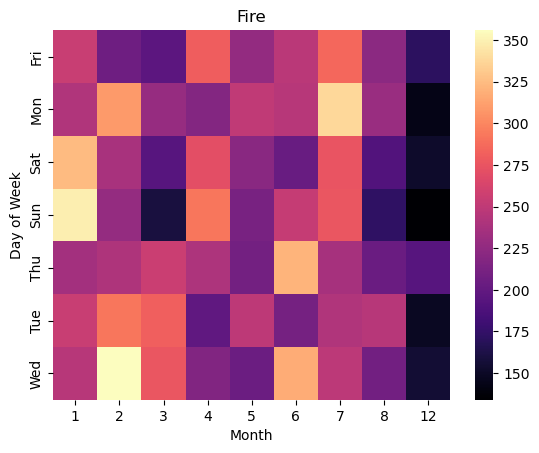

In [26]:
fireHeat = sns.heatmap(monthByDayFire,cmap = 'magma')
fireHeat.set_title('Fire')

In [380]:
monthByDayEMS


Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,982,765,780,1002,810,778,1040,629,529
Mon,799,934,789,813,912,797,767,766,663
Sat,931,721,696,892,725,755,907,578,480
Sun,969,674,683,693,792,665,913,540,527
Thu,769,746,973,770,817,973,801,568,576
Tue,831,794,972,699,917,826,790,822,571
Wed,782,779,939,811,761,926,811,605,552


In [381]:
monthByDayFire


Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,255,206,196,280,226,247,285,222,171
Mon,242,309,228,218,251,245,338,230,143
Sat,324,238,193,271,221,203,275,191,152
Sun,349,227,160,292,212,253,276,173,134
Thu,235,241,256,240,209,321,237,204,193
Tue,255,292,281,199,249,210,242,245,148
Wed,245,356,276,217,205,317,248,208,155


In [382]:
monthByDayTraffic

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,733,610,549,676,694,624,720,459,365
Mon,686,721,518,567,616,575,587,515,451
Sat,1036,482,377,571,498,430,513,330,346
Sun,642,328,259,503,420,415,483,308,246
Thu,580,609,671,591,564,771,608,458,497
Tue,887,667,631,532,752,640,638,545,515
Wed,673,768,674,489,572,815,658,482,555
